In [8]:
# Import necessary libraries
import pandas as pd
import re

# Load data
data = pd.read_csv('/Users/lasyatummala/Downloads/archive/Sentimet Analysis/Train.csv')

# Define a function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply text cleaning to the 'Body' column
data['Body'] = data['Body'].apply(clean_text)

# Drop rows with missing or empty values in 'Body' and 'Sentiment Type'
data = data.dropna(subset=['Body', 'Sentiment Type']).reset_index(drop=True)

# Encode the target variable (Sentiment Type)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sentiment Type'] = encoder.fit_transform(data['Sentiment Type'])

# Output cleaned data
data.to_csv('/Users/lasyatummala/Downloads/archive/Sentimet Analysis/Cleaned_Train.csv', index=False)
print("Data preprocessing complete. Cleaned data saved to 'Cleaned_Train.csv'.")


Data preprocessing complete. Cleaned data saved to 'Cleaned_Train.csv'.


In [9]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import re

# Load cleaned data
data = pd.read_csv('/Users/lasyatummala/Downloads/archive/Sentimet Analysis/Cleaned_Train.csv')

# Handle missing or NaN values in 'Body' column
data['Body'] = data['Body'].fillna("")

# Split data into features (X) and labels (y)
X = data['Body']
y = data['Sentiment Type']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF Vectorizer and Random Forest Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = pipeline.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

# Output results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8075
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.56        62
           1       0.82      0.97      0.89       220
           2       0.81      0.69      0.74       118

    accuracy                           0.81       400
   macro avg       0.78      0.71      0.73       400
weighted avg       0.80      0.81      0.80       400



Sentiment Distribution:
 1    1010
2     632
0     358
Name: Sentiment Type, dtype: int64


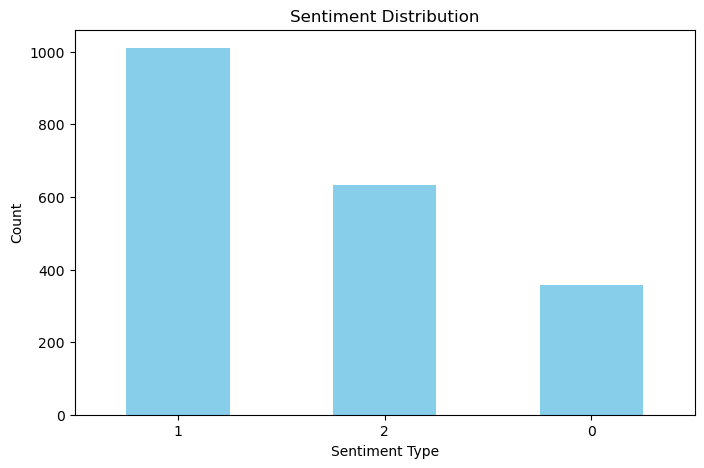

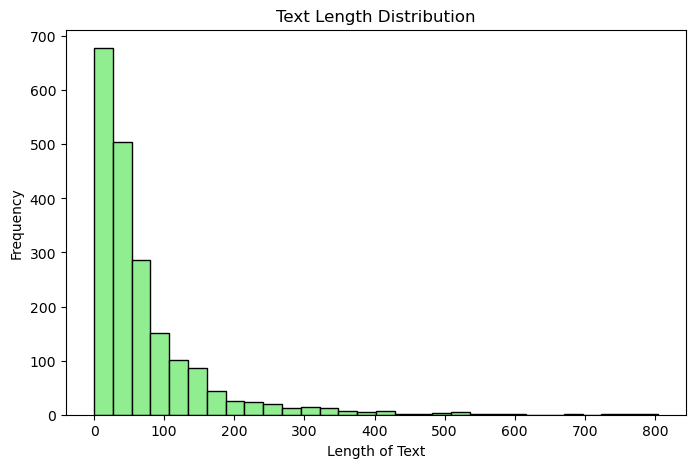

Text Length Statistics:
 count    2000.000000
mean       69.371000
std        87.660353
min         0.000000
25%        20.000000
50%        42.000000
75%        85.000000
max       804.000000
Name: Text Length, dtype: float64
Accuracy: 0.8075
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.56        62
           1       0.82      0.97      0.89       220
           2       0.81      0.69      0.74       118

    accuracy                           0.81       400
   macro avg       0.78      0.71      0.73       400
weighted avg       0.80      0.81      0.80       400



In [10]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('/Users/lasyatummala/Downloads/archive/Sentimet Analysis/Cleaned_Train.csv')

# Handle missing or NaN values in 'Body' column
data['Body'] = data['Body'].fillna("")

# Analyze the distribution of sentiments
sentiment_counts = data['Sentiment Type'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Analyze the length of text in the 'Body' column
data['Text Length'] = data['Body'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(8, 5))
plt.hist(data['Text Length'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Text Length Distribution")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()

# Output basic statistics of text length
text_length_stats = data['Text Length'].describe()
print("Text Length Statistics:\n", text_length_stats)

# Split data into features (X) and labels (y)
X = data['Body']
y = data['Sentiment Type']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF Vectorizer and Random Forest Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = pipeline.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

# Output results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


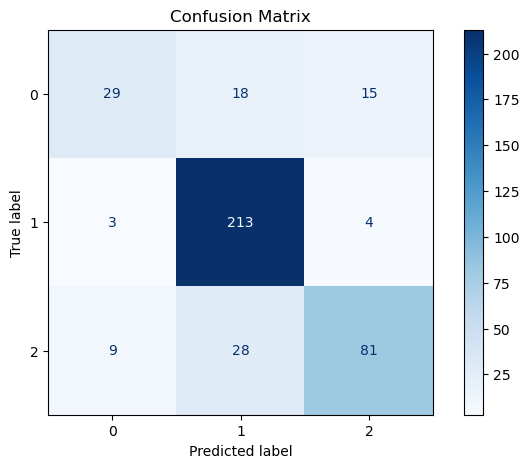

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 5))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.named_steps['clf'].classes_).plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


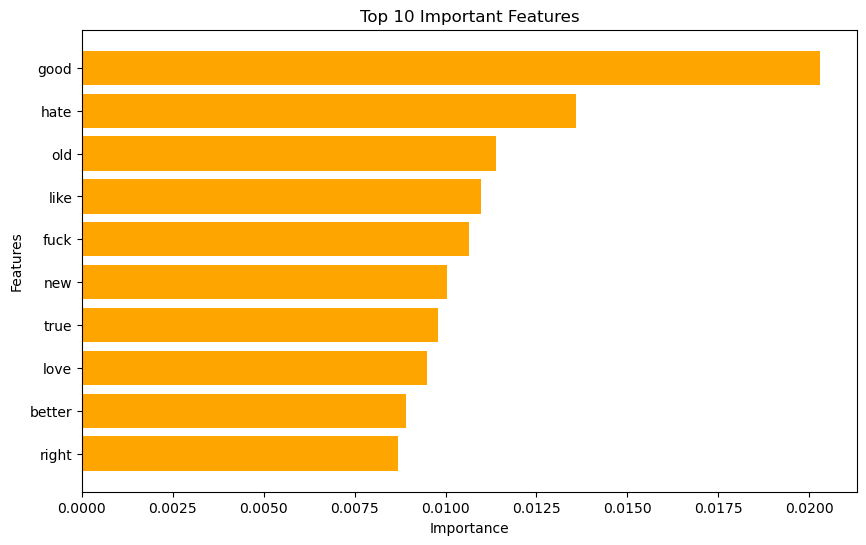

In [12]:

# Visualize feature importance
import numpy as np
feature_importances = pipeline.named_steps['clf'].feature_importances_
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

# Combine and sort feature importances
top_indices = np.argsort(feature_importances)[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_indices)), feature_importances[top_indices], align='center', color='orange')
plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
